In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
%matplotlib inline

In [10]:
labels = pd.read_csv("s3://dogfaces/tensor_model/output_labels_20170907.txt", names=["dog_breed"])
labels.head()

,dog_breed
0,rottweiler
1,bull mastiff
2,french bulldog
3,cairn
4,yorkshire terrier


### Get confusion matrix

In [5]:
df_conf = pd.read_csv("s3://dogfaces/tensor_model/test_result_20170907.txt", sep=" ", names=["image_name", "pred", "actual"])

In [7]:
df_conf.tail()

,image_name,pred,actual
953,train_images/West_Highland_white_terrier/n0209...,52,52
954,train_images/West_Highland_white_terrier/n0209...,52,52
955,train_images/West_Highland_white_terrier/n0209...,52,52
956,train_images/West_Highland_white_terrier/n0209...,52,52
957,train_images/West_Highland_white_terrier/n0209...,52,52


In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    '''
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    '''

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
y_pred = df_conf['pred']
y_true = df_conf['actual']

Normalized confusion matrix
[[ 1.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    1.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.94 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  1.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.85  0.  ]
 [ 0.    0.    0.   ...,  0.    0.    1.  ]]


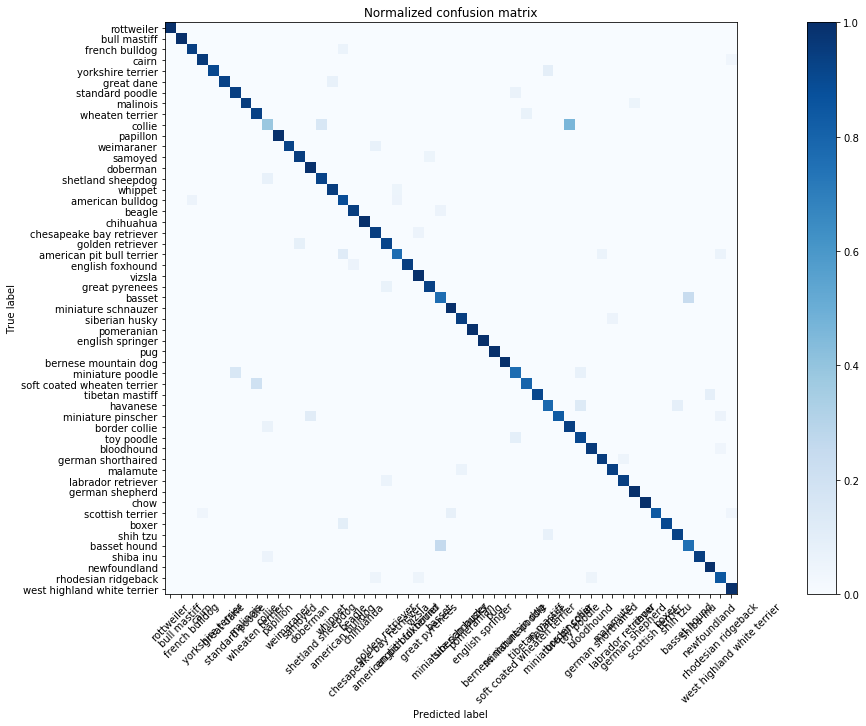

In [26]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure(figsize=(10,10))
#plot_confusion_matrix(cnf_matrix, classes=labels.dog_breed,
#                      title='Confusion matrix, without normalization')
#plt.show()

#Plot normalized confusion matrix
plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, classes=labels.dog_breed, normalize=True,
                      title='Normalized confusion matrix')

plt.show()